In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Job Generator Component (JGC)

In [ ]:
class Job:
    def __init__(self, job_id, offer_time):
        self.job_id = job_id
        self.offer_time = offer_time
        self.length = random.randint(1, 5)  # lj
        self.due_date = offer_time + random.randint(3, 10)  # dj
        self.value_class = random.choice([0, 1, 2, 3, 4])  # vj
        self.penalty_class = random.choice([0, 1, 2, 3, 4])  # pj

    def __repr__(self):
        return f"(ID:{self.job_id}, o:{self.offer_time}, d:{self.due_date}, l:{self.length}, v:{self.value_class}, p:{self.penalty_class})"

def generate_jobs(n_jobs):
    return [Job(i, i) for i in range(n_jobs)]

# Q-Learning Agent

In [ ]:
class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, epsilon=0.2):
        self.q_table = defaultdict(float)
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon

    def get_state(self, job, schedule_fill_level):
        return (schedule_fill_level, job.value_class, job.penalty_class)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(["accept", "reject"])
        else:
            accept_q = self.q_table[(state, "accept")]
            reject_q = self.q_table[(state, "reject")]
            return "accept" if accept_q >= reject_q else "reject"

    def update(self, state, action, reward, next_state):
        future_q = max(
            self.q_table[(next_state, "accept")], self.q_table[(next_state, "reject")]
        )
        self.q_table[(state, action)] += self.alpha * (
            reward + self.gamma * future_q - self.q_table[(state, action)]
        )

# Deterministic Scheduling Component

In [ ]:
class DeterministicScheduler:
    def __init__(self):
        self.schedule = []

    def classify_schedule(self):
        if not self.schedule:
            return 0
        max_ratio = max(
            (sum(j.length for j in self.schedule[:i+1]) / (j.due_date - j.offer_time))
            for i, j in enumerate(self.schedule)
            if j.due_date > j.offer_time
        )
        if max_ratio <= 0.2:
            return 0
        elif max_ratio <= 0.4:
            return 1
        elif max_ratio <= 0.7:
            return 2
        elif max_ratio <= 1.0:
            return 3
        else:
            return 4

    def add_job(self, job, current_time):
        end_time = sum(j.length for j in self.schedule) + current_time
        on_time = end_time <= job.due_date
        self.schedule.append(job)
        return (job.value_class * 10 if on_time else -job.penalty_class * 5)

# Training Loop

In [ ]:
def train_agent(n_epochs=200, n_jobs=1000, epsilon=0.2):
    agent = QLearningAgent(epsilon=epsilon)
    rewards_per_epoch = []

    for epoch in range(n_epochs):
        jobs = generate_jobs(n_jobs)
        scheduler = DeterministicScheduler()
        total_reward = 0

        for job in jobs:
            schedule_fill = scheduler.classify_schedule()
            state = agent.get_state(job, schedule_fill)
            action = agent.choose_action(state)

            if action == "accept":
                reward = scheduler.add_job(job, job.offer_time)
            else:
                reward = 0  # no reward or penalty

            next_fill = scheduler.classify_schedule()
            next_state = agent.get_state(job, next_fill)
            agent.update(state, action, reward, next_state)

            total_reward += reward

        rewards_per_epoch.append(total_reward)

    return agent, rewards_per_epoch

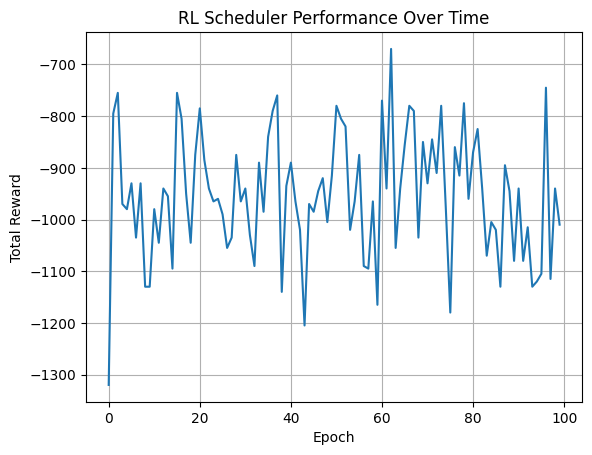

In [ ]:
agent, total_rewards = train_agent(n_epochs=100, n_jobs=1000, epsilon=0.2)

plt.plot(total_rewards)
plt.xlabel("Epoch")
plt.ylabel("Total Reward")
plt.title("RL Scheduler Performance Over Time")
plt.grid(True)
plt.show()

# Plot

In [ ]:
def run_benchmark(n_jobs=1000):
    jobs = generate_jobs(n_jobs)
    scheduler = DeterministicScheduler()
    total_reward = 0

    for job in jobs:
        if scheduler.classify_schedule() <= 4:
            reward = scheduler.add_job(job, job.offer_time)
        else:
            reward = 0
        total_reward += reward
    return total_reward

In [ ]:
benchmark_income = run_benchmark()
print("Benchmark total reward:", benchmark_income)

Benchmark total reward: -10180


# Benchmark Heuristic for Comparison

In [ ]:
# --- Print Final Metrics ---
print("\n📊 Final RL Scheduler Evaluation")
print(f"Average Reward (last 10 epochs): {np.mean(total_rewards[-10:]):.2f}")
print(f"Best Reward Achieved: {max(total_rewards):.2f}")
print(f"Worst Reward Achieved: {min(total_rewards):.2f}")
print(f"Benchmark total reward (naive scheduling): {benchmark_income:.2f}") # Changed benchmark_reward to benchmark_income




📊 Final RL Scheduler Evaluation
Average Reward (last 10 epochs): -1020.00
Best Reward Achieved: -670.00
Worst Reward Achieved: -1320.00
Benchmark total reward (naive scheduling): -10180.00


# Results

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


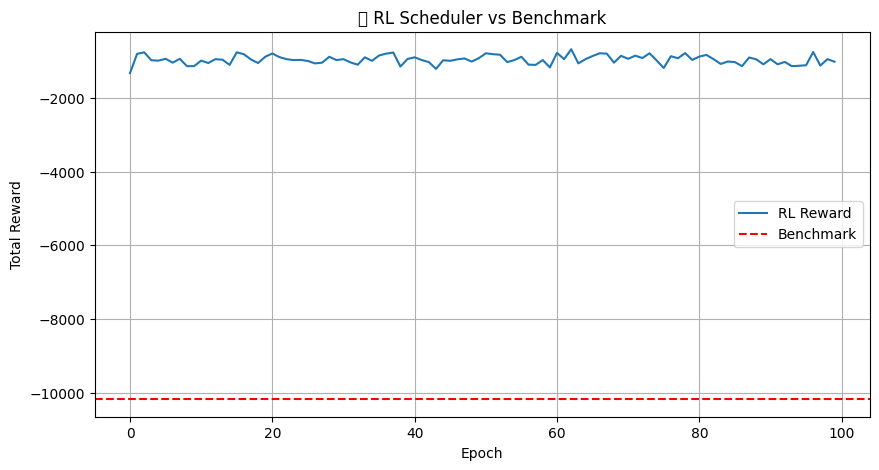

In [ ]:
# --- Reward Plot ---
plt.figure(figsize=(10, 5))
plt.plot(total_rewards, label='RL Reward')
plt.axhline(y=benchmark_income, color='r', linestyle='--', label='Benchmark') # Changed benchmark_reward to benchmark_income
plt.title("🎯 RL Scheduler vs Benchmark")
plt.xlabel("Epoch")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


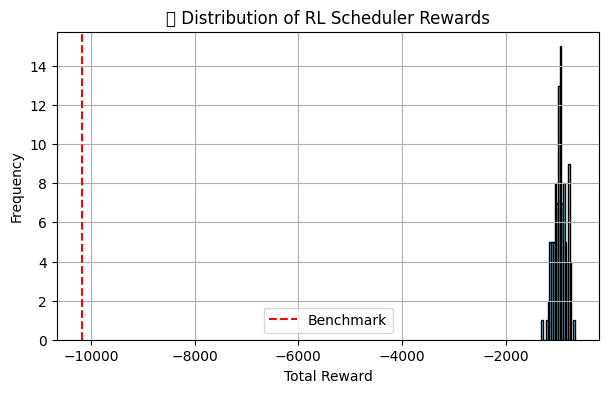

In [ ]:
# --- Reward Histogram ---
plt.figure(figsize=(7, 4))
plt.hist(total_rewards, bins=20, color='skyblue', edgecolor='black')
plt.axvline(benchmark_income, color='red', linestyle='--', label='Benchmark') # Changed benchmark_reward to benchmark_income
plt.title("📈 Distribution of RL Scheduler Rewards")
plt.xlabel("Total Reward")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()



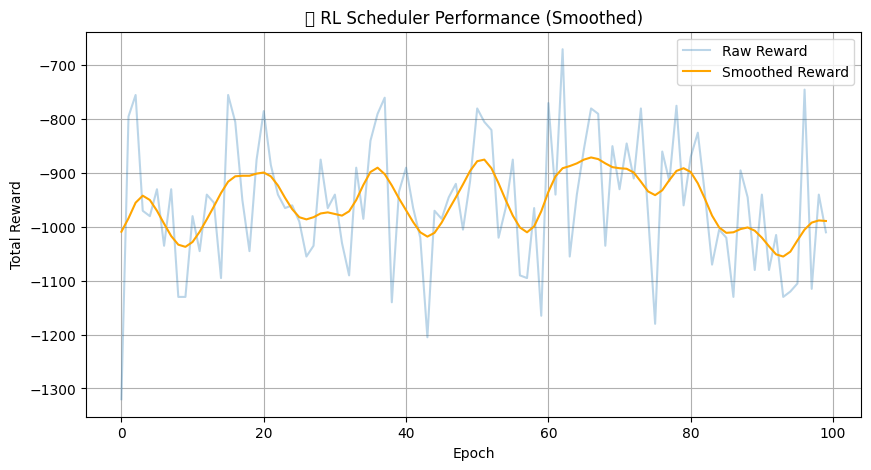

In [ ]:
# --- Reward Trend (Smoothed) ---
from scipy.ndimage import gaussian_filter1d
smoothed = gaussian_filter1d(total_rewards, sigma=2)
plt.figure(figsize=(10, 5))
plt.plot(total_rewards, label='Raw Reward', alpha=0.3)
plt.plot(smoothed, label='Smoothed Reward', color='orange')
plt.title("📉 RL Scheduler Performance (Smoothed)")
plt.xlabel("Epoch")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()

# PPO implementation

## Environment Gym-Compatible

In [ ]:
!pip install stable-baselines3
!pip install gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import gym
from gym import spaces
import numpy as np

class JobShopEnv(gym.Env):
    def __init__(self):
        super(JobShopEnv, self).__init__()
        self.num_jobs = 5
        self.num_machines = 3
        self.max_steps = self.num_jobs
        self.current_step = 0

        # Each job has a processing time for each machine
        self.processing_times = np.random.randint(1, 10, (self.num_jobs, self.num_machines))

        # Observation: job's current machine + processing times
        self.observation_space = spaces.Box(low=0, high=10, shape=(self.num_jobs * self.num_machines,), dtype=np.float32)
        self.action_space = spaces.Discrete(self.num_jobs)

        self.done_jobs = set()

    def reset(self):
        self.current_step = 0
        self.done_jobs = set()
        self.processing_times = np.random.randint(1, 10, (self.num_jobs, self.num_machines))
        return self._get_obs()

    def _get_obs(self):
        return self.processing_times.flatten().astype(np.float32)

    def step(self, action):
        if action in self.done_jobs:
            reward = -100.0  # Penalty
        else:
            reward = -np.sum(self.processing_times[action])
            self.done_jobs.add(action)
            self.current_step += 1

        done = self.current_step >= self.max_steps
        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print("Current Processing Times:")
        print(self.processing_times)

In [ ]:
!pip uninstall -y gym
!pip install gymnasium

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2


In [ ]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces

class JobShopEnv(gym.Env):
    def __init__(self):
        super(JobShopEnv, self).__init__()
        self.num_jobs = 3
        self.num_machines = 3
        self.max_steps = self.num_jobs * self.num_machines

        # Observation: current time on each machine + current job/machine status
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(self.num_jobs + self.num_machines,), dtype=np.float32)

        # Action: which job to process next
        self.action_space = spaces.Discrete(self.num_jobs)

        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        # Processing times (jobs × machines)
        self.processing_times = np.random.randint(1, 10, (self.num_jobs, self.num_machines))

        self.machine_available_time = np.zeros(self.num_machines)
        self.job_next_machine = np.zeros(self.num_jobs, dtype=int)
        self.job_ready_time = np.zeros(self.num_jobs)
        self.current_step = 0

        obs = self._get_obs()
        return obs, {}

    def _get_obs(self):
    # Must return float32 to match gymnasium space declaration
        return np.concatenate([self.job_ready_time, self.machine_available_time]).astype(np.float32)

    def step(self, action):
        if self.job_next_machine[action] >= self.num_machines:
            # Invalid action: job already completed
            reward = -100  # big penalty
            terminated = False
            truncated = False
            return self._get_obs(), reward, terminated, truncated, {}

        machine = self.job_next_machine[action]
        start_time = max(self.job_ready_time[action], self.machine_available_time[machine])
        duration = self.processing_times[action, machine]
        end_time = start_time + duration

        self.job_ready_time[action] = end_time
        self.machine_available_time[machine] = end_time
        self.job_next_machine[action] += 1
        self.current_step += 1

        reward = -end_time  # Negative reward to minimize total time

        terminated = self.current_step >= self.max_steps
        truncated = False

        return self._get_obs(), reward, terminated, truncated, {}

    def render(self):
        print("Job Ready Times:", self.job_ready_time)
        print("Machine Availability:", self.machine_available_time)

In [ ]:
from stable_baselines3.common.env_checker import check_env

env = JobShopEnv()
check_env(env)  # This will now pass

#Train PPO Agent

In [ ]:
from stable_baselines3 import PPO

# Create a fresh environment instance
env = JobShopEnv()

# Define and train PPO model
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 13.5     |
|    ep_rew_mean     | -609     |
| time/              |          |
|    fps             | 1194     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 13.3        |
|    ep_rew_mean          | -596        |
| time/                   |             |
|    fps                  | 879         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005868457 |
|    clip_fraction        | 0.0222      |
|    clip_range           | 0.2         |
|    entropy_loss   

# Evaluate PPO Agent

In [ ]:
ppo_rewards = []

for _ in range(100):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
    ppo_rewards.append(total_reward)

# Print results
print("\n📊 PPO Evaluation:")
print(f"Average Total Reward: {np.mean(ppo_rewards):.2f}")
print(f"Best Total Reward: {np.max(ppo_rewards):.2f}")
print(f"Worst Total Reward: {np.min(ppo_rewards):.2f}")


📊 PPO Evaluation:
Average Total Reward: -600.00
Best Total Reward: -102.00
Worst Total Reward: -2028.00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


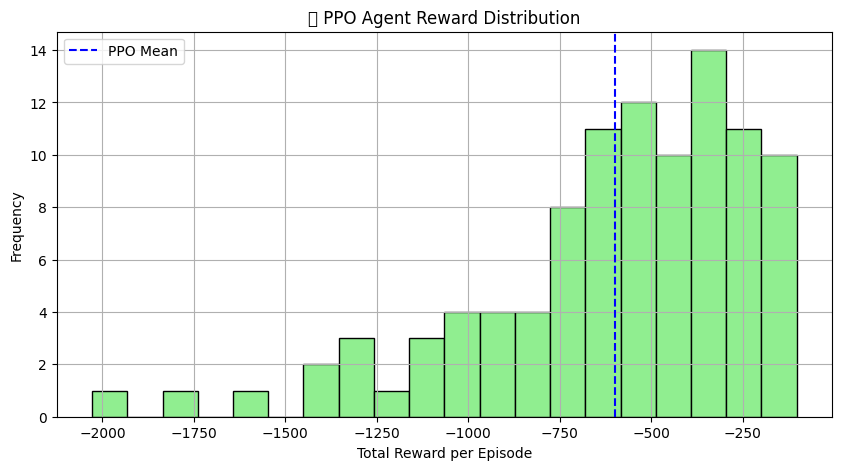

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(ppo_rewards, bins=20, color='lightgreen', edgecolor='black')
plt.axvline(np.mean(ppo_rewards), color='blue', linestyle='--', label='PPO Mean')
plt.title("🎯 PPO Agent Reward Distribution")
plt.xlabel("Total Reward per Episode")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Plot REINFORCE vs PPO Comparison

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


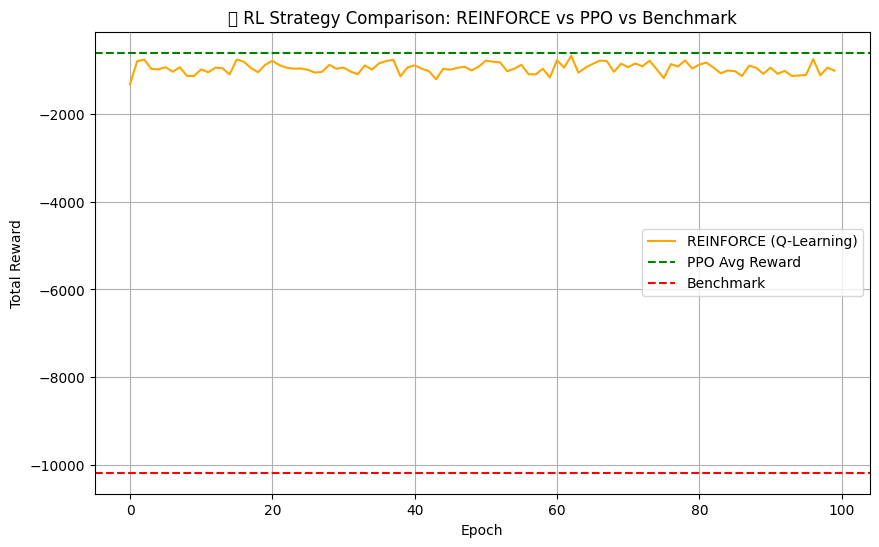

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(total_rewards, label='REINFORCE (Q-Learning)', color='orange')
plt.axhline(y=np.mean(ppo_rewards), color='green', linestyle='--', label='PPO Avg Reward')
plt.axhline(y=benchmark_income, color='red', linestyle='--', label='Benchmark') # Changed benchmark_reward to benchmark_income
plt.title("📈 RL Strategy Comparison: REINFORCE vs PPO vs Benchmark")
plt.xlabel("Epoch")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()